In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors	import	KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Obtain - Obtenção dos dados

A base de dados Telco Customer Churn é uma coleção de informações relacionadas aos clientes de uma empresa fictícia chamada Telco, que atua no setor de telecomunicações. Essa base de dados foi criada para analisar e compreender o fenômeno do churn, que se refere à rotatividade de clientes.

A base de dados contém uma variedade de atributos sobre os clientes, incluindo informações demográficas, como idade, gênero e estado civil, assim como dados sobre os serviços contratados, como tipo de plano, duração do contrato, uso de serviços adicionais (como internet, telefone, TV) e histórico de pagamentos. Além disso, também registra informações sobre a ocorrência de churn, indicando se um cliente cancelou o serviço ou permaneceu como cliente.

**Importando as bibliotecas e carregando da base de dados**

In [3]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Descrição da base de dados


**Primeiras linhas da base de dados**

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Resumo das informações da base de dados

In [5]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Descrição dos *atributos*

- customerID: Um ID único que identifica cada cliente;
- gender: sexo do cliente - Masculino, Feminino;
- SeniorCitizen: Se o cliente é idoso ou não (1, 0);
- Partner: Se o cliente tem um parceiro ou não (Sim, Não);
- Dependents: Se o cliente possui dependentes ou não (Sim, Não);
- tenure: Número de meses que o cliente permaneceu na empresa;
- PhoneService: Se o cliente possui atendimento telefônico ou não (Sim, Não);
- MultipleLines: Se o cliente tem várias linhas ou não (Sim, Não, Sem atendimento telefônico);
- InternetService: Provedor de internet do cliente (DSL, Fibra ótica, Não);
- OnlineSecurity: Se o cliente tem segurança online ou não (Sim, Não, Sem serviço de internet);
- OnlineBackup: Se o cliente tem backup online ou não (Sim, Não, Sem serviço de internet);
- DeviceProtection: Se o cliente tem proteção de dispositivo ou não (Sim, Não, Sem serviço de internet);
- TechSupport: Se o cliente tem suporte técnico ou não (Sim, Não, Sem serviço de internet);
- StreamingTV: Se o cliente tem streaming de TV ou não (Sim, Não, Sem serviço de internet);
- StreamingMovies: Se o cliente tem streaming de filmes ou não (Sim, Não, Sem serviço de internet);
- Contract: O prazo do contrato do cliente (mês a mês, um ano, dois anos);
- PaperlessBilling: Se o cliente tem faturamento sem papel ou não (Sim, Não);
- PaymentMethod: Método de pagamento do cliente (Cheque Eletrônico, Cheque Postado, Transferência Bancária (automática), Cartão de Crédito (automático));
- MonthlyCharges: O valor cobrado mensalmente do cliente;
- TotalCharges: O valor total cobrado do cliente;
- Churn: Se o cliente cancelou ou não (Sim ou Não).

# Scrub - Limpeza dos dados

## Remoção de dados nulos

Inicialmente, é observado nos objetos da base de dados se há dados do tipo TotalCharges, que são valores numéricos com o tipo object. Caso exista é necessário a conversão do valores TotalCharges para float.

In [6]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')


Podemos ver que existem 11 valores nulos no TotalCharges

In [8]:
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Remoção de dados faltantes e de atributos irrelevante

- Remover registros com valores ausentes
- Remover os costumers IDs do dataset (não iremos precisar);

In [9]:
telecom_cust.dropna(inplace = True)

telecom_cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Contratos de curta duração (month to month), falta de segurança cibernética e assistência técnica parecem estar associados de forma positiva ao churn. Por outro lado, contratos de longa duração parecem estar associados de forma negativa ao churn.

Curiosamente, serviços como proteção online, transmissão de TV, armazenamento em nuvem, suporte técnico, etc. quando não estão conectados à internet parecem estar inversamente relacionados ao churn.

## Removendo dados duplicados

In [10]:
telecom_cust.duplicated().sum()

0

In [11]:
telecom_cust= telecom_cust.drop_duplicates()

# Explore - Exploração dos dados

## Estatisticas da base de dados

Nessa etapa, é explorado o dataset a fim de reconhecer melhor os padrões presentes nos dados, atributos e classes para extrair algumas hipóteses sobre os dados.
Primeiro, é analisado as distribuição dos atributos de forma individual e, em seguida, fatiar e analisar nossos dados em busca de tendências interessantes.

### Estatísticas Gerais da Base de dados

In [13]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Model - Modelagem

## Tranformação dos atributos

Como foi observado anteriormente, a base de dados possuí alguns atributos categóricos, nesse caso é necessário remapear as observações da base de dados e converter todas os atributos ​​categóricos em atributos numéricos.

**Codificação para transformar atributos categóricos em numéricos:**

In [14]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
mapeamento = {'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1, '0': 0, '1': 1}

telecom_cust.drop(['customerID'], axis=1, inplace=True)
telecom_cust[columns] = telecom_cust[columns].replace(mapeamento)

df_dummies = pd.get_dummies(telecom_cust)
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [15]:
for coluna in df_dummies.columns:
  print(f'{coluna}: {df_dummies[coluna].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
MultipleLines_No: [0 1]
MultipleLines_No phone service: [1 0]
MultipleLines_Yes: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
OnlineSecurity_No: [1 0]
OnlineSecurity_No internet service: [0 1]
OnlineSecurity_Yes: [0 1]
OnlineBackup_No: [0 1]
OnlineBackup_No internet service: [0 1]
OnlineBackup_Yes: [1 0]
DeviceProtection_No: [1 0]
DeviceProtection_No internet service: [0 1]
DeviceProtection_Yes: [0 1]
TechSupport_No: [1 0]
TechSupport_No internet service: [0 1]
TechSu

## Normalização dos dados

In [16]:
colunas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_numerico = df_dummies[colunas_numericas]
df_numerico.to_csv('df_numerico.csv', index=False)

In [17]:
cols_to_normalize = ['tenure', 'MonthlyCharges', 'TotalCharges']
data_to_normalize = df_dummies[cols_to_normalize]


normalized_data = StandardScaler().fit_transform(data_to_normalize)

df_dummies[cols_to_normalize] = normalized_data

df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,1,0,0,1,0,0,0,0,1,0


## Rótulos e Atributos

In [18]:
rotulos = df_dummies[['Churn']]
df_dummies = df_dummies.drop('Churn',axis=1)

## Divisão da base de dados treino e teste

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies, rotulos, test_size=.2,stratify=rotulos)

## Treino e Validação dos modelos

In [21]:
def treino_modelo(model,X, y, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True)

    val_acc, test_acc = [], []

    for treino_index, validacao_index in kf.split(X, y):

        x_treino, X_validacao = X.iloc[treino_index], X.iloc[validacao_index]
        y_treino, y_validacao = y.iloc[treino_index], y.iloc[validacao_index]

        # Aplicando o SPLIT de treino
        sm = SMOTE(random_state=42)
        x_treino, y_treino = sm.fit_resample(x_treino, y_treino)

        model.fit(x_treino, y_treino)


        y_predito = model.predict(X_validacao)
        val_acc.append(accuracy_score(y_validacao, y_predito))


        test_acc.append(model.predict(X_test))
    # Imprimir as acurácias de treinamento e validação para cada fold
    for fold, val_scores in enumerate(val_acc):
        print(f"Fold {fold+1}: ACC: {100*val_scores:.4f}")

    # Calcular a média das acurácias de treinamento e validação
    mean_val_accuracy = sum(val_acc) / len(val_acc)
    print(f"Média : ACC: {100*mean_val_accuracy:.4f}\n")
    return val_acc, test_acc, model

### Grid Search dos hiperparâmetros

In [22]:
def grid_search(x_treino, y_treino, parametros, model):
    grid_search = GridSearchCV(estimator=model, param_grid=parametros, cv=5)
    grid_search.fit(x_treino, y_treino)

    print("Melhores hiperparâmetros:", grid_search.best_params_)
    print("Acurácia no conjunto de teste:", grid_search.best_estimator_.score(X_test, y_test))

## Modelos

In [24]:
sm = SMOTE(random_state=42)
x_treino, y_treino = sm.fit_resample(X_train, y_train)

### SVM

In [25]:
parametros_SVM = {
    "kernel" : ["rbf","linear","sigmoid","poly"] ,
    "C": [10e-3, 10e-2, 10e-1, 1, 10, 100],
    "gamma": ["scale","auto"]
}
modelo_SVM = svm.SVC()

grid_search(x_treino, y_treino, parametros_SVM, modelo_SVM)

c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array w

Melhores hiperparâmetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Acurácia no conjunto de teste: 0.7725657427149965


In [26]:
modelo_SVM = svm.SVC(kernel='rbf',C=10,gamma='scale')
validacao_svm, teste_acc_svm, modelo_SVM = treino_modelo(modelo_SVM,X_train, y_train, 5)

c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array w

Fold 1: ACC: 75.2889
Fold 2: ACC: 76.5333
Fold 3: ACC: 79.2889
Fold 4: ACC: 76.0889
Fold 5: ACC: 76.7111
Média : ACC: 76.7822



In [27]:
import pickle

# Salvar o modelo em um arquivo .pkl
filename = 'modelo_SVM.pkl'
pickle.dump(modelo_SVM, open(filename, 'wb'))

In [28]:
print('Acurácia:', accuracy_score(modelo_SVM.predict(X_test), y_test)*100)
print('Precisao:', precision_score(modelo_SVM.predict(X_test), y_test)*100)

Acurácia: 77.18550106609808
Precisao: 68.98395721925134


###

### KNN

In [29]:
parametros_KNN = {
    "weights" : ["distance","uniform"] ,
    "n_neighbors": [5, 8, 10, 15, 20],
    "p": [1,2]
}
modelo_KNN = KNeighborsClassifier()

grid_search(x_treino, y_treino, parametros_KNN, modelo_KNN)

c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d ar

Melhores hiperparâmetros: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Acurácia no conjunto de teste: 0.7263681592039801


In [30]:
modelo_KNN = KNeighborsClassifier(n_neighbors= 5, p= 1, weights = 'distance')
validacao_KNN, teste_acc_KNN, modelo_KNN = treino_modelo(modelo_KNN,X_train, y_train, 5)

c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d ar

Fold 1: ACC: 71.2889
Fold 2: ACC: 72.5333
Fold 3: ACC: 70.7556
Fold 4: ACC: 71.4667
Fold 5: ACC: 72.4444
Média : ACC: 71.6978



In [31]:
import pickle

# Salvar o modelo em um arquivo .pkl
filename = 'modelo_KNN.pkl'
pickle.dump(modelo_KNN, open(filename, 'wb'))

In [32]:
print('Acurácia:', accuracy_score(modelo_KNN.predict(X_test), y_test)*100)
print('Precisao:', precision_score(modelo_KNN.predict(X_test), y_test)*100)

Acurácia: 73.34754797441366
Precisao: 65.50802139037432


###

# Interpret - Interpretação do modelo

Resultados obtidos em cada um dos modelos:

In [34]:

print('SVM:')
print('Acurácia:', accuracy_score(modelo_SVM.predict(X_test), y_test)*100)
print('Precisao:', precision_score(modelo_SVM.predict(X_test), y_test)*100)
print('F1:', f1_score(modelo_SVM.predict(X_test), y_test)*100)
print('Recall:', recall_score(modelo_SVM.predict(X_test), y_test)*100)

print('KNN:')
print('Precisao:', precision_score(modelo_KNN.predict(X_test), y_test)*100)
print('Precisao:', precision_score(modelo_KNN.predict(X_test), y_test)*100)
print('F1:', f1_score(modelo_KNN.predict(X_test), y_test)*100)
print('Recall:', recall_score(modelo_KNN.predict(X_test), y_test)*100)

SVM:
Acurácia: 77.18550106609808
Precisao: 68.98395721925134
F1: 61.64874551971325
Recall: 55.72354211663067
KNN:
Precisao: 65.50802139037432
Precisao: 65.50802139037432
F1: 56.64739884393063
Recall: 49.89816700610998


In [35]:
pred_SVM = teste_acc_svm[np.argmax(validacao_svm)]
pred_KNN = teste_acc_KNN[np.argmax(validacao_KNN)]

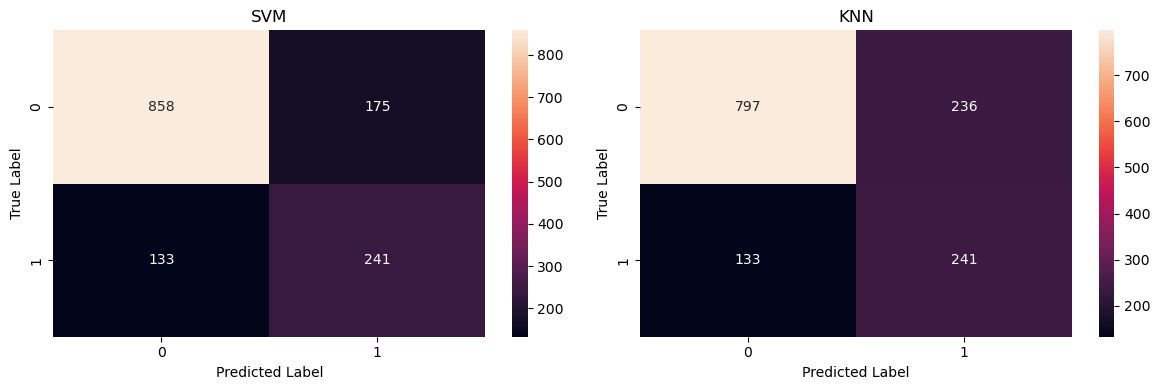

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(metrics.confusion_matrix(y_test, pred_SVM), annot=True, fmt='g', ax=axs[0]).set(title='SVM', ylabel='True Label', xlabel='Predicted Label')
sns.heatmap(metrics.confusion_matrix(y_test, pred_KNN), annot=True, fmt='g', ax=axs[1]).set(title='KNN', ylabel='True Label', xlabel='Predicted Label')
plt.tight_layout()
plt.show()

### Curva ROC

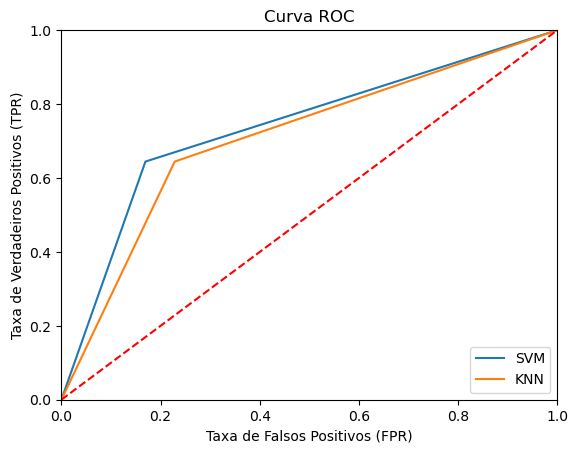

In [39]:

fpr_svm, tpr_svm, _ = roc_curve(y_test, pred_SVM)
fpr_knn, tpr_knn, _ = roc_curve(y_test, pred_KNN)

plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_knn, tpr_knn, label='KNN')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()